# 3. Parsing Dates

## 설명
- 날짜가 들어 있는 칼럼을 실제 날짜로 인식할 수 있도록 바꿔주는 작업
- dtype이 object일 경우 해당 칼럼이 날짜를 가지고 있더라도 `dt` 접근자를 사용할 수 없다. 왜냐하면 판다스가 해당 칼럼을 날짜로 인식하지 못하기 때문이다.
- 판다스에는 `datetime64`라는 dtype이 존재한다.
- 만약 칼럼에 date formate이 여러 개일 경우, 판다스가 적절한 date format을 추론하도록 `infer_datetime_format=True`를 넣어준다. 단, 이것은 꼭 필요한 경우라고 판단될 때만 넣는다.

## 코드

In [10]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/catalog.csv')
df.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [4]:
# date 칼럼의 dtype은 object로 되어 있다.
df.date.dtype

dtype('O')

In [5]:
df['date_parsed'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df.date_parsed.head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [9]:
# day만 가져오기
day_of_month = df['date_parsed'].dt.day
day_of_month

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date_parsed, Length: 1693, dtype: float64

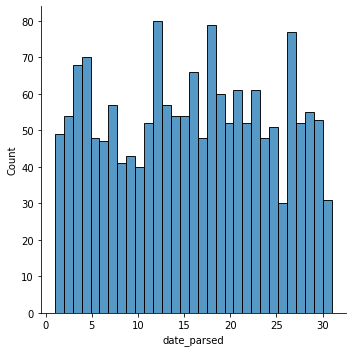

In [12]:
# 그래프 그려보기
day_of_month = day_of_month.dropna()
sns.displot(day_of_month, kde=False, bins=31)